# HAFS hurricane model data: read one time step (48h fcst)
### GRIB2 format requires `conda install -c conda-forge cfgrib` in this environment 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
!ls /Users/brianmapes/Box/MPO624_data/HAFS_data_and_code/3dData/

Readme.txt
natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2
natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.923a8.idx
natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.ctl
natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.idx


In [3]:
filename = '/Users/brianmapes/Box/MPO624_data/HAFS_data_and_code/3dData/natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2'

In [ ]:
# DatasetBuildError: multiple values for unique key, try re-open the file with one of:
#     filter_by_keys={'typeOfLevel': 'meanSea'}
#     filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
#     filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
#     filter_by_keys={'typeOfLevel': 'surface'}
#     filter_by_keys={'typeOfLevel': 'heightAboveGround'}
#     filter_by_keys={'typeOfLevel': 'cloudTop'}
#     filter_by_keys={'typeOfLevel': 'nominalTop'}
#     filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
#     filter_by_keys={'typeOfLevel': 'tropopause'}
    
ds3d = xr.open_dataset(filename, filter_by_keys={'typeOfLevel': 'isobaricInhPa'}) 

Ignoring index file '/Users/brianmapes/Box/MPO624_data/HAFS_data_and_code/3dData/natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.923a8.idx' incompatible with GRIB file


In [ ]:
ds3d

## Plot some fields, bigger than default
https://xarray.pydata.org/en/stable/user-guide/plotting.html

(array([1.94774104e+08, 4.18505430e+07, 2.85416070e+07, 1.77252750e+07,
        1.40908890e+07, 9.78050300e+06, 9.48548000e+05, 5.82060000e+04,
        6.73500000e+03, 2.35000000e+02]),
 array([1.8787327e-07, 3.0062799e-03, 6.0123722e-03, 9.0184640e-03,
        1.2024556e-02, 1.5030649e-02, 1.8036740e-02, 2.1042833e-02,
        2.4048924e-02, 2.7055018e-02, 3.0061109e-02], dtype=float32),
 <BarContainer object of 10 artists>)

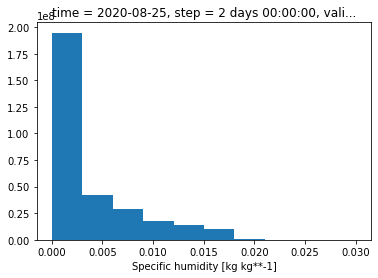

In [33]:
# ds3d.q.plot()

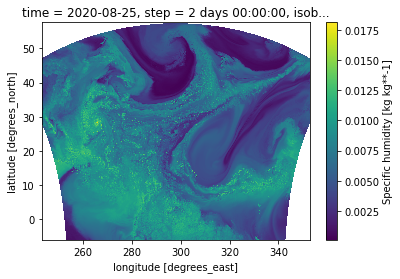

In [47]:
ds3d.q[10].plot(aspect=1.5, size=5)

-----------
## That is only the 3D variables, can I get the 2D variables? 

In [ ]:
# The above only seems to get the 3D variables, not the 2D ones
# ds2 = xr.open_dataset(filename, filter_by_keys={'typeOfLevel': 'surface'})

# DatasetBuildError: multiple values for unique key, try re-open the file with one of:
#     filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'}
#     filter_by_keys={'stepType': 'max', 'typeOfLevel': 'surface'}
#     filter_by_keys={'stepType': 'accum', 'typeOfLevel': 'surface'}
#     filter_by_keys={'stepType': 'avg', 'typeOfLevel': 'surface'}
    
    
ds2 = xr.open_dataset(filename, filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'atmosphereSingleLayer'})

Ignoring index file '/Users/brianmapes/Box/MPO624_data/HAFS_data_and_code/3dData/natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.923a8.idx' incompatible with GRIB file


In [ ]:
ds2

In [ ]:
ds2.pwat.plot(aspect=1, size=5)

## Could I read it all at once? 
### let's try `pip install xgrads`


In [3]:
import xgrads

In [11]:
from xgrads import CtlDescriptor

ctlfile = '/Users/bem/Box/MPO624_data/HAFS_data_and_code/3dData/natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.ctl'
ctl = CtlDescriptor(file=ctlfile)

# print all the info in ctl file
print(ctl)


ValueError: invalid literal for int() with base 10: '45,100'

In [18]:
# what is this 45,100 thing? 

!head -20 ~/Box/MPO624_data/HAFS_data_and_code/3dData/natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.ctl

dset ^natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2
index ^natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2.idx
undef 9.999E+20
title natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2
* produced by g2ctl v0.1.4
* command line options: natl00l.2020082500.hafsprs.synoptic.0p03.f048.grb2
* griddef=1:0:(3651 x 2121):grid_template=0:winds(N/S): lat-lon grid:(3651 x 2121) units 1e-06 input WE:SN output WE:SN res 48 lat -6.000000 to 57.599998 by 0.029999 lon 243.250000 to 352.749998 by 0.029999 #points=7743771:winds(N/S)

dtype grib2
ydef 2121 linear -6.000000 0.029999
xdef 3651 linear 243.250000 0.029999
tdef 1 linear 00Z27aug2020 1mo
* PROFILE hPa
zdef 45 levels 100000 97500 95000 92500 90000 87500 85000 82500 80000 77500 75000 72500 70000 67500 65000 62500 60000 57500 55000 52500 50000 47500 45000 42500 40000 37500 35000 32500 30000 27500 25000 22500 20000 17500 15000 12500 10000 7000 5000 3000 2000 1000 700 500 200
options pascals
vars 72
ABSVprs    45,100  0,2,10 ** (1000 975 950

---------------------

## Aww crap, it's all just been hacked on as lists of codes for grb2
from http://cola.gmu.edu/grads/gadoc/descriptorfile.html#VARS

The format of the variable records is as follows:

varname levs units description                                 (Version 2.0.1 or earlier)
varname levs <additional_codes> units description    (Version 2.0.2 or later)

levs (DTYPE grib2)
(GrADS version 2.0) This is a comma-delimited list of numbers that provide information about the vertical dimension of a variable. The first number in the list is the number of vertical levels the variable contains or zero if the variable doesn't vary in Z. The remaining numbers are the GRIB2 parameters that specify the veritcal level or layer. The levs field may contain up to five comma-delimited numbers:

NLEVS,LTYPE,LVAL,LVAL2,LTYPE2
where
NLEVS	=	The number of vertical levels, or 0 if not Z-varying (Required)
LTYPE	=	The level type indicator (Required)
LVAL	=	The value of the 1st level (Not Required for all level types)
LVAL2	=	The value of the 2nd level (Only Required for layers between 2 fixed levels)
LTYPE2	=	The level type indicator for the 2nd level (Only required if different from LTYPE)